# Изучение рынка заведений общественного питания Москвы

- Автор: Сурков Алексей Александрович 
- Дата:15.01.2025
<a id='intro'></a>

# Цели и задачи проекта

## Провести исследовательский анализ рынка Москвы
 * Загрузка данных и знакомство с ними
 * Подготовить данные к исследовательскому анализу
 * Провести исследовательский анализ исходных данных
 * По результатам проведённого исследовательского анализа данных сформулировать итоговый вывод и рекомендации для заказчика


### Описание данных


##### Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
 - 0 — заведение не является сетевым;
 - 1 — заведение является сетевым.
- seats — количество посадочных мест.
##### Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
 - «Средний счёт: 1000–1500 ₽»;
 - «Цена чашки капучино: 130–220 ₽»;
 -  Цена бокала пива: 400–600 ₽». 
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
 - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
 - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
 - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
-middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
 - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
 - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
 - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

- [Загрузка данных и знакомство с ними](#1.-Загрузка-данных-и-знакомство-с-ними)
- [Предобработка данных](#2.-Предобработка-данных )
- [Исследовательский анализ данных](#3.-Исследовательский-анализ-данных)
- [Итоговый вывод и рекомендации](#4.-Итоговый-вывод-и-рекомендации)


## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
!pip install phik

In [5]:
# Импортируем библиотеку pandas
import pandas as pd

In [6]:
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [8]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info =pd.read_csv('/datasets/rest_info.csv')
rest_price = pd.read_csv('/datasets/rest_price.csv')

# Познакомимся с данными датасета /datasets/rest_info.csv и /datasets/rest_price.csv 
- выведем первые строки методом head()
- информацию о датафрейме методом info()


In [9]:
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [10]:
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [11]:
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [12]:
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [13]:
rest_info.shape

(8406, 9)

In [14]:
rest_price.shape

(4058, 5)

In [15]:
# Подсчитываем процент строк с пропусками
round(rest_info.isna().sum()/len(rest_info)*100,2) 

id           0.00
name         0.00
category     0.00
address      0.00
district     0.00
hours        6.38
rating       0.00
chain        0.00
seats       42.96
dtype: float64

In [16]:
# Подсчитываем процент строк с пропусками
round(rest_price.isna().sum()/len(rest_price)*100,2)

id                    0.00
price                18.31
avg_bill              5.96
middle_avg_bill      22.40
middle_coffee_cup    86.82
dtype: float64

---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.


Датасет rest_info содержит 8406 строк и 9 столбцов

Датасет rest_price содержит 4058 строк  и 5 столбцов.
* Пропуски:

В rest_info:
  - Все колонки, кроме hours и seats, содержат ожидаемые данные.
  - hours содержит 536 пропусков(6%), а seats — 3611 пропуск(43%).
#Типы данных в остальных колонках соответствуют описанию.

В rest_price:
- Колонки price, avg_bill, middle_avg_bill и middle_coffee_cup содержат пропуски.
  - price имеет 743 пропуска(18%), avg_bill — 242 пропуска(6%), middle_avg_bill — 909 пропусков(22%), middle_coffee_cup — 3523 пропуска (87).
- Типы данных:

  В целом типы данных соответствуют описанию. Однако стоит обратить внимание на пропуски, особенно в столбце seats и middle_coffee_cup, где процент пропусков очень высок.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [17]:
df= pd.merge(rest_info,rest_price, on='id',how='left')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [19]:
df.duplicated().sum()


0

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [20]:
df['seats'] = df['seats'].fillna(-1).astype(int) # исправил на -1 

In [21]:
# проверяем преобразование 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              8406 non-null   int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(3), int64(2), object(8)
memory usage: 919.4+ KB


In [22]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN


- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [23]:
# Замена пропусков
df['hours'].fillna('не указано', inplace=True)
df['seats'].fillna(0, inplace=True)

df['price'].fillna('не указано', inplace=True)
df['avg_bill'].fillna('не указано', inplace=True)

In [24]:
# Замена NaN на -1 для middle_avg_bill и middle_coffee_cup
df['middle_avg_bill'].fillna(-1, inplace=True)
df['middle_coffee_cup'].fillna(-1, inplace=True)

In [25]:
# проверка на пропуски 
df.isna().sum()

id                   0
name                 0
category             0
address              0
district             0
hours                0
rating               0
chain                0
seats                0
price                0
avg_bill             0
middle_avg_bill      0
middle_coffee_cup    0
dtype: int64

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [26]:
df.duplicated().sum()

0

In [27]:
df.duplicated(subset='id').sum()

0

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [28]:
def is_24_7(x):
    if x=='ежедневно, круглосуточно':
        return True
    return False

In [29]:
df['is_24_7'] = df['hours'].apply(is_24_7)

In [30]:
df[['name', 'hours', 'is_24_7']].head(15)

,name,hours,is_24_7
0,WoWфли,"ежедневно, 10:00–22:00",False
1,Четыре комнаты,"ежедневно, 10:00–22:00",False
2,Хазри,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",False
3,Dormouse Coffee Shop,"ежедневно, 09:00–22:00",False
4,Иль Марко,"ежедневно, 10:00–22:00",False
5,Sergio Pizza,"ежедневно, 10:00–23:00",False
6,Огни города,пн 15:00–04:00; вт-вс 15:00–05:00,False
7,Mr. Уголёк,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",False
8,Donna Maria,"ежедневно, 10:00–22:00",False
9,Готика,"ежедневно, 12:00–00:00",False


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

После проведения предобработки данных в нашем DataFrame были выполнены следующие шаги:
- Объединение датасетов:  
Данные из двух исходных датасетов rest_info и rest_price были успешно объединены по столбцу id с использованием метода pd.merge(). В результате мы получили DataFrame с 8406 записями и 13 столбцами.
- Проверка и преобразование типов данных:  
Столбец seats был преобразован в целочисленный тип. Пропуски в этом столбце были заменены на 0, что позволило избежать ошибок при дальнейших операциях.
- Обработка пропущенных значений:  
Все пропущенные значения в столбцах hours, price, и avg_bill были заменены на строку 'не указано'.
Пропуски в столбцах middle_avg_bill и middle_coffee_cup были заменены на -1, что позволяет легко идентифицировать отсутствующие данные.
После обработки пропусков в DataFrame не осталось ни одного NaN значения, что подтверждается результатом df.isna().sum().
- Проверка на дубликаты:  
В результате проверки на явные и неявные дубликаты в DataFrame не было найдено ни одной дублирующейся записи. Это свидетельствует о том, что данные уникальны по столбцу id.
- Создание нового столбца is_24_7:  
Новый столбец is_24_7 был добавлен для обозначения того, работает ли заведение ежедневно и круглосуточно.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [31]:
# Подсчет количества заведений по каждой категории
category_counts = df['category'].value_counts()

In [32]:
category_counts # добавил вывод информации 

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [33]:
# размер графика 
plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

Text(0, 0.5, 'Количество заведений')

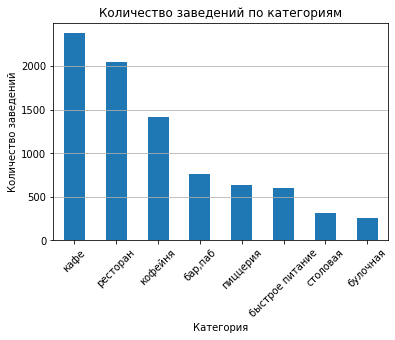

In [34]:
# Строим столбчатую диаграмму
category_counts.plot(kind='bar',rot=45)
plt.grid(axis='y')
plt.title('Количество заведений по категориям')  
plt.xlabel('Категория') 
plt.ylabel('Количество заведений')

На столбчатой диаграмме видно распределение заведений по категориям. Кафе и рестораны занимают наибольшую долю в общем количестве заведений, что указывает на их популярность среди потребителей. В то же время, такие категории, как столовая и булочная, представлены в меньшем количестве, что может говорить о более узкой нише и возможностях для расширения.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [35]:
# Подсчет количества заведений по административным районам
district_counts = df['district'].value_counts()

In [36]:
district_counts

Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [37]:
district_percentages = district_counts / district_counts.sum() * 100  # Доли

In [38]:
round(district_percentages,2)

Центральный административный округ         26.67
Северный административный округ            10.71
Южный административный округ               10.61
Северо-Восточный административный округ    10.60
Западный административный округ            10.12
Восточный административный округ            9.49
Юго-Восточный административный округ        8.49
Юго-Западный административный округ         8.43
Северо-Западный административный округ      4.87
Name: district, dtype: float64

In [39]:
plt.figure(figsize=(16, 8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

Text(0, 0.5, 'Количество заведений')

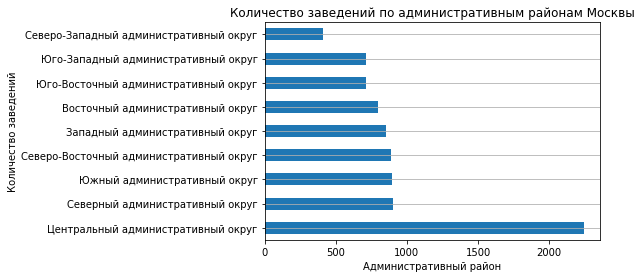

In [40]:
district_counts.plot(kind='barh')
plt.grid(axis='y')
plt.title('Количество заведений по административным районам Москвы')  
plt.xlabel('Административный район') 
plt.ylabel('Количество заведений')

In [41]:
central_districts = df[df['district'] == 'Центральный административный округ']

In [42]:
central_category_counts = central_districts['category'].value_counts()

In [43]:
central_category_counts # добавил вывод информации 

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

In [44]:
central_category_percentages = central_category_counts / central_category_counts.sum() * 100 # Доли

In [45]:
round(central_category_percentages,2) 

ресторан           29.88
кафе               20.70
кофейня            19.09
бар,паб            16.24
пиццерия            5.04
быстрое питание     3.88
столовая            2.94
булочная            2.23
Name: category, dtype: float64

In [46]:
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0, 0.5, 'Количество заведений')

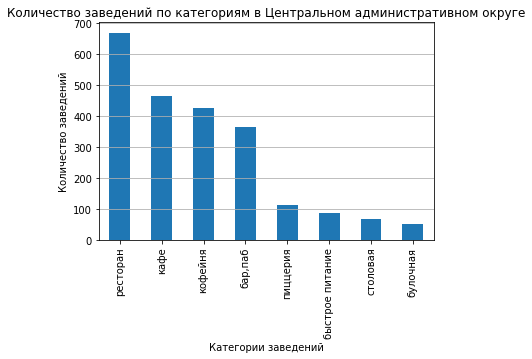

In [47]:
central_category_counts.plot(kind='bar')
plt.grid(axis='y')
plt.title('Количество заведений по категориям в Центральном административном округе')
plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений')

Общее распределение по районам: На первом графике можно будет увидеть, что в Центральном административном  округе больше всего заведений 2242 ,т.е (  26.67%)  это достаточно много по сравнею с другими округами.

Распределение в Центральном округе: Второй график покажет, как распределяются заведения по категориям в Центральном административном округе рестораны занимают первое место с количестов 670 заведений , что равняется (29.88%), затем идут кафе 464 заведений (20.70%.) 

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [48]:
# Подсчет количества сетевых и несетевых заведений
chain_counts = df['chain'].value_counts()
chain_counts.index = ['Несетевые', 'Сетевые']
chain_counts

Несетевые    5201
Сетевые      3205
Name: chain, dtype: int64

In [50]:
# Проценты НЕсетевых и сетевых 
round(chain_percentages,2)

Несетевые    61.87
Сетевые      38.13
Name: chain, dtype: float64

In [51]:
# Подсчет количества заведений по категориям и типу (сетевое/несетевое)
df['chain_label'] = df['chain'].map({0: 'Несетевые', 1: 'Сетевые'})
category_chain_counts = df.groupby(['category', 'chain_label']).size().unstack(fill_value=0)
category_chain_counts


chain_label,Несетевые,Сетевые
category,,
"бар,паб",596,169
булочная,99,157
быстрое питание,371,232
кафе,1599,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,730
столовая,227,88


In [52]:
category_chain_percent = category_chain_counts.div(category_chain_counts.sum(axis=1), axis=0) * 100

In [53]:
round(category_chain_percent,2)

chain_label,Несетевые,Сетевые
category,,
"бар,паб",77.91,22.09
булочная,38.67,61.33
быстрое питание,61.53,38.47
кафе,67.24,32.76
кофейня,49.04,50.96
пиццерия,47.87,52.13
ресторан,64.27,35.73
столовая,72.06,27.94


In [54]:
result = ([category_chain_counts, category_chain_percent])

In [55]:
result

[chain_label      Несетевые  Сетевые
 category                           
 бар,паб                596      169
 булочная                99      157
 быстрое питание        371      232
 кафе                  1599      779
 кофейня                693      720
 пиццерия               303      330
 ресторан              1313      730
 столовая               227       88,
 chain_label      Несетевые    Сетевые
 category                             
 бар,паб          77.908497  22.091503
 булочная         38.671875  61.328125
 быстрое питание  61.525705  38.474295
 кафе             67.241379  32.758621
 кофейня          49.044586  50.955414
 пиццерия         47.867299  52.132701
 ресторан         64.268233  35.731767
 столовая         72.063492  27.936508]

(-1.1135554219709467,
 1.121219417266968,
 -1.1116028426829725,
 1.1005525163182368)

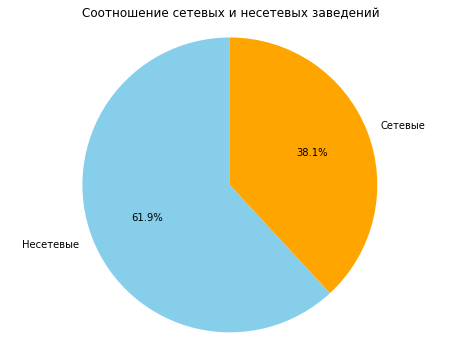

In [56]:
# Визуализация общего количества сетевых и несетевых заведений
plt.figure(figsize=(8, 6))
plt.pie(chain_counts, labels=chain_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Соотношение сетевых и несетевых заведений')
plt.axis('equal')

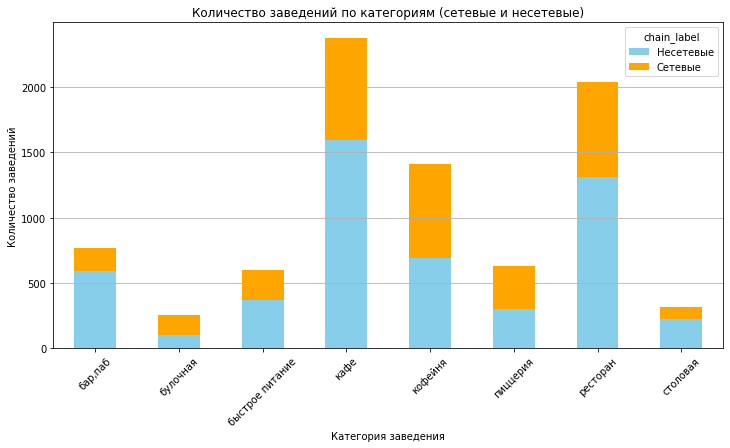

In [57]:
# Визуализация количества заведений по категориям и типу (сетевое/несетевое)
category_chain_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange'],rot=45)
plt.title('Количество заведений по категориям (сетевые и несетевые)')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.legend=True
plt.grid(axis='y')

# В результате анализа мы можем сделать следующие выводы:  
В целом, несетевые заведения (61,9%) преобладают над сетевыми (38,1%), что может свидетельствовать о разнообразии и независимости рынка.
- Распределение по категориям:  
По категориям наибольшее количество сетевых заведений наблюдается в булочных 157 заведения (61%), пиццериях 330 заведения  (52%)  и кофейнях  720 заведений , что равняется почти (51%) от несетевых заведений . Это может указывать на высокий спрос на данные категории среди потребителей.
Визуализации помогают более наглядно представить данные и выявить ключевые тенденции.
- Рекомендации:  
Для новых заведений стоит рассмотреть открытие в категориях с высоким процентом сетевых заведений, таких как булочные и пиццерии, так как это может быть знаком высокой конкуренции и спроса.


---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [58]:
 # Фильтруем данные, чтобы исключить заведения без посадочных мест
df_new = df[df['seats'] > -1]

In [59]:
df_new

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7,chain_label
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-1.0,False,Несетевые
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,-1.0,False,Несетевые
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,-1.0,False,Сетевые
6,96ebceb1a09e4e3191133b9fe0379a64,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45,средние,Средний счёт:199 ₽,199.0,-1.0,False,Несетевые
7,0243288b78024af090b8e947842c969c,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45,средние,Средний счёт:200–300 ₽,250.0,-1.0,False,Несетевые
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,не указано,не указано,-1.0,-1.0,False,Несетевые
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,не указано,не указано,-1.0,-1.0,False,Несетевые
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,не указано,Средний счёт:от 150 ₽,150.0,-1.0,True,Несетевые
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,не указано,не указано,-1.0,-1.0,True,Сетевые


In [60]:
# Вычисляем медианное количество посадочных мест по категориям
quantity_seats = df_new.groupby('category')['seats'].median().reset_index().sort_values(by='seats', ascending=False)

In [61]:
quantity_seats 

,category,seats
6,ресторан,86.0
0,"бар,паб",82.5
4,кофейня,80.0
7,столовая,75.5
2,быстрое питание,65.0
3,кафе,60.0
5,пиццерия,55.0
1,булочная,50.0


Text(0, 0.5, 'Категории заведений')

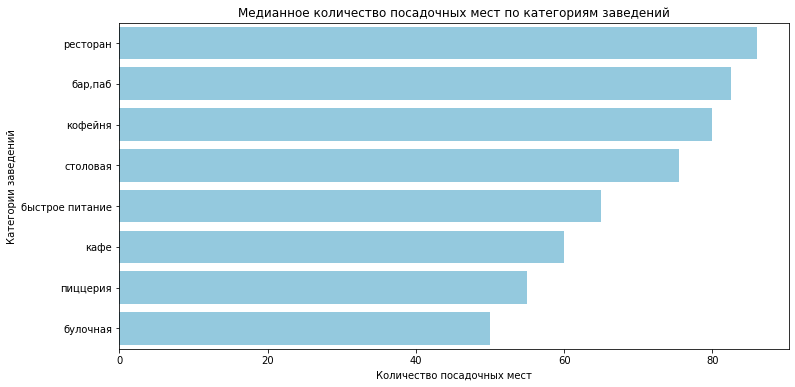

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x='seats', y='category', data=quantity_seats,color='skyblue')
plt.title('Медианное количество посадочных мест по категориям заведений')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Категории заведений')

Text(0.5, 0, 'Количество посадочных мест')

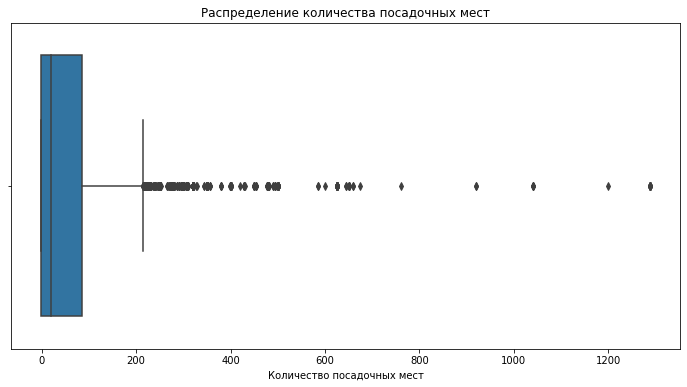

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='seats', data=df)
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

- Аномальные значения и выбросы:  
На графике "Распределение количества посадочных мест: , видно  что имеются выбросы, которые находятся за пределами "усов".  
Значения, превышающие 120, могут свидетельствовать о возможных ошибках в данных или о наличии заведений с действительно большим количеством мест.
Мы можем заметить, что выбросы начинаются примерно с 200 мест и выше 
- Типичное количество посадочных мест:  
Рестораны имеют наибольшее медианное количество мест (86), в то время как булочные имеют наименьшее (50). Это может быть связано с форматом обслуживания и целевой аудиторией каждого типа заведения.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [64]:
# Группируем данные по категориям и вычисляем средний рейтинг
average_ratings = df.groupby('category')['rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='rating', ascending=False)

In [65]:
# Выводим результат 
average_ratings

,category,rating
0,"бар,паб",4.387712
5,пиццерия,4.301264
6,ресторан,4.290357
4,кофейня,4.277282
1,булочная,4.268359
7,столовая,4.211429
3,кафе,4.123886
2,быстрое питание,4.050249


Text(0, 0.5, 'Категории заведений')

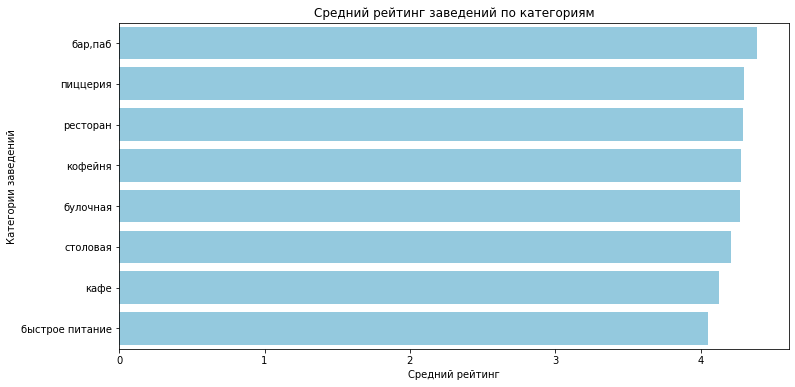

In [66]:
# Визуализация средних рейтингов
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='category', data=average_ratings, color='skyblue')
plt.title('Средний рейтинг заведений по категориям')
plt.xlabel('Средний рейтинг')
plt.ylabel('Категории заведений')

После визуализации можно проанализировать, насколько  различаются средние рейтинги для разных типов общепита. Мы можем обратить внимание на: у бар,паб самый высокий рейтинг, а у категории быстрое питание самый низкий. У категории ( пиццерия, ресторан, кофейня булочная) практически одинаковый рейтинг.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [67]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix= df[['rating','category','district','chain','seats','price','is_24_7']].phik_matrix()

interval columns not set, guessing: ['rating', 'chain', 'seats']


In [68]:
# Выводим результат
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

,rating
price,0.281294
district,0.200691
category,0.190003
is_24_7,0.150173
chain,0.108092
seats,0.000000


Наибольшая корреляция происходит со столбцом price 

Text(0.5, 1.0, 'Тепловая карта коэффициента phi_k \n для данных rating')

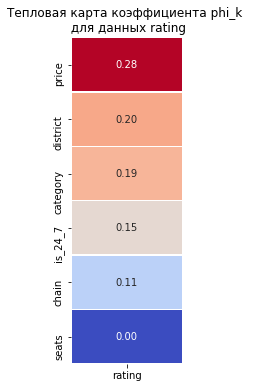

In [69]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']]\
.sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap, annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False )
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')



Text(0, 0.5, 'Рейтинг')

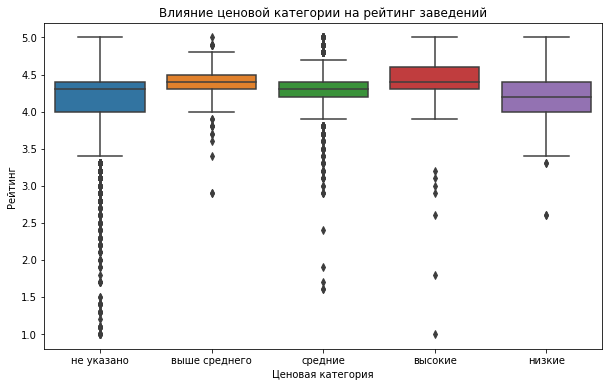

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', y='rating', data=df,)
plt.title('Влияние ценовой категории на рейтинг заведений')
plt.xlabel('Ценовая категория')
plt.ylabel('Рейтинг')

На основании проведенного анализа можно сделать вывод, что ценовая категория является самым сильным фактором, влияющим на рейтинг заведений. Это может быть полезно для владельцев ресторанов и заведений общественного питания при принятии решений о ценообразовании и позиционировании на рынке. Учитывая, что ценовая категория оказывает значительное влияние на восприятие качества заведений.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [71]:
# Фильтруем данные, чтобы оставить только те строки, где chain равно 1(т.е сетевые)
filtered_df = df[df['chain'] == 1]

In [72]:
# Группируем данные по сети и считаем количество заведений и средний рейтинг
top_chains = filtered_df.groupby(['name', 'category']).agg(
    count=('name','size'),  # Количество заведений
    average_rating=('rating', 'mean')  # Средний рейтинг
).reset_index()

In [73]:
top_chains

,name,category,count,average_rating
0,1-я Креветочная,кафе,1,3.700000
1,10 Идеальных Пицц,ресторан,3,4.300000
2,18 Грамм,кофейня,3,4.466667
3,4 Сезона,кафе,1,4.700000
4,7 Сэндвичей,кофейня,4,3.975000
...,...,...,...,...
1157,Ян Примус,ресторан,2,4.550000
1158,Яндекс Лавка,ресторан,69,3.872464
1159,Яндекс.Лавка,ресторан,3,3.466667
1160,Японская кухня,кафе,2,4.500000


In [74]:
top_15_chains = top_chains.sort_values(by='count', ascending=False).head(15)

In [75]:
top_15_chains

,name,category,count,average_rating
1142,Шоколадница,кофейня,119,4.178151
504,Домино'с Пицца,пиццерия,76,4.169737
497,Додо Пицца,пиццерия,74,4.286486
206,One Price Coffee,кофейня,71,4.064789
1158,Яндекс Лавка,ресторан,69,3.872464
73,Cofix,кофейня,65,4.075385
242,Prime,ресторан,49,4.114286
558,КОФЕПОРТ,кофейня,42,4.147619
644,Кулинарная лавка братьев Караваевых,кафе,39,4.394872
978,Теремок,ресторан,36,4.105556


In [76]:
top_15_chains_cat= top_15_chains.groupby(['count','category'])

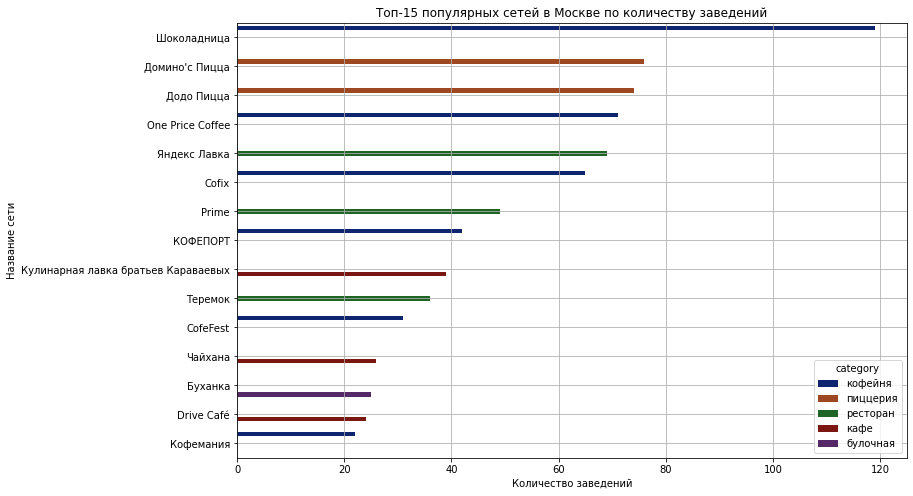

In [77]:
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='name', data=top_15_chains, hue='category', palette='dark')
plt.title('Топ-15 популярных сетей в Москве по количеству заведений')
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
plt.grid(True)

Среди сетей лидером по количеству заведений является кофейня Шоколадница - практически 120 заведений. Из графика видно,что больше всего объектов одной сети встречается в категории Кофейня.

В ходе анализа мы сгруппировали данные по названиям заведений и определили топ-15 популярных сетей в Москве на основе количества заведений. Мы также рассчитали средний рейтинг для каждой из этих сетей и проанализировали их категории.

1. Топ-3 по количеству заведений:  
Шоколадница - 119 заведений  
Домино'с Пицца - 76 заведений  
Додо Пицца - 74 заведения  
2. Топ-3 по среднему рейтингу:  
Кофемания - средний рейтинг 4.39  
Буханка - средний рейтинг 4.41  
Кулинарная лавка братьев Караваевых - средний рейтинг 4.39
3. Топ-3 по категории заведений:
- Кофейни:  
  Шоколадница  
  One Price Coffee  
  Cofix
- Пиццерии:  
  Домино'с Пицца  
  Додо Пицца
- Рестораны:  
  Яндекс Лавка  
  Prime  
  Теремок

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [78]:
#  Фильтруем данные, чтобы исключить записи с недоступными значениями
filtered_avg_bill = df[df['middle_avg_bill'] != -1]

In [79]:
average_bill_by_district = filtered_avg_bill.groupby('district')['middle_avg_bill'].mean().reset_index()

In [80]:
average_bill_by_district = average_bill_by_district.sort_values(by='middle_avg_bill', ascending=False)

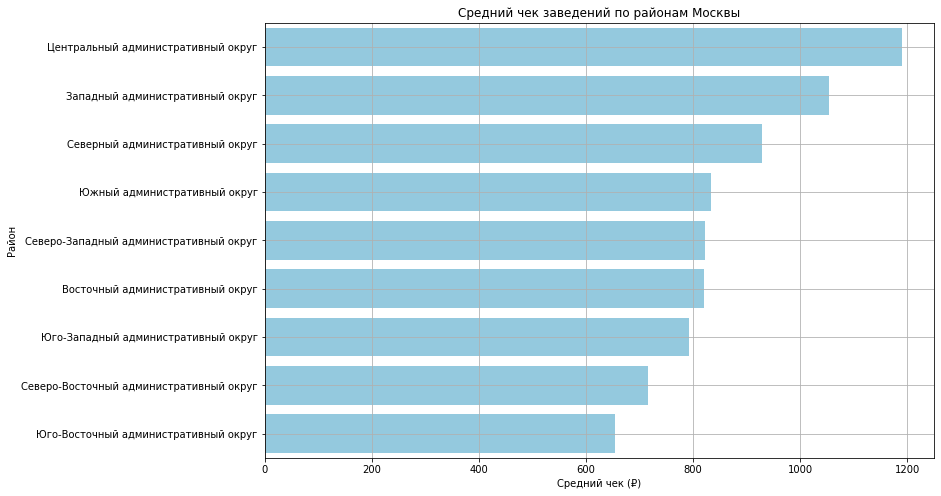

In [81]:
plt.figure(figsize=(12, 8))
sns.barplot(x='middle_avg_bill', y='district', data=average_bill_by_district, color='skyblue')
plt.title('Средний чек заведений по районам Москвы')
plt.xlabel('Средний чек (₽)')
plt.ylabel('Район')
plt.grid(True)

In [82]:
central_avg = average_bill_by_district[average_bill_by_district['district'] == 'Центральный административный округ']['middle_avg_bill'].values[0]
other_avg = average_bill_by_district[average_bill_by_district['district'] != 'Центральный административный округ']['middle_avg_bill'].mean()

In [83]:
#Средний чек в Центральном административном округе
round(central_avg,2)

1191.06

In [84]:
#Средний чек в остальных округах
round(other_avg,2)

827.71

In [85]:
def classify_distance(row):
    if row['district'] == 'Центральный административный округ':
        return 'Центр'
    elif row['district'] in ['Северный административный округ', 'Северо-Восточный административный округ', 
                              'Северо-Западный административный округ', 'Западный административный округ']:
        return 'Ближе к центру'
    else:
        return 'Дальше от центра'

In [86]:
pd.options.mode.chained_assignment = None

In [87]:
filtered_avg_bill['distance_category'] = filtered_avg_bill.apply(classify_distance, axis=1)

In [88]:
average_bill_by_distance = filtered_avg_bill.groupby('distance_category')['middle_avg_bill'].mean().reset_index()

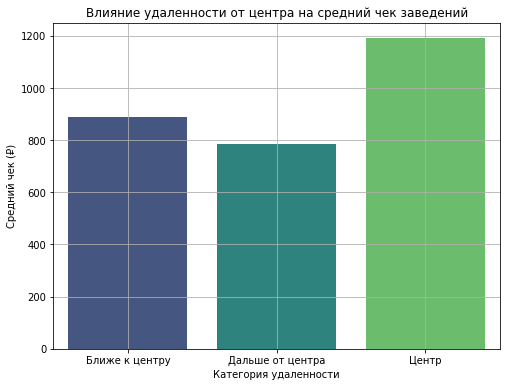

In [89]:
plt.figure(figsize=(8, 6))
sns.barplot(x='distance_category', y='middle_avg_bill', data=average_bill_by_distance, palette='viridis')
plt.title('Влияние удаленности от центра на средний чек заведений')
plt.xlabel('Категория удаленности')
plt.ylabel('Средний чек (₽)')
plt.grid()

In [90]:
average_bill_by_distance

,distance_category,middle_avg_bill
0,Ближе к центру,889.391344
1,Дальше от центра,786.152542
2,Центр,1191.057547


 Cредний чек в Центральном административном округе будет значительно выше, это может указывать на то, что заведения в центре ориентированы на более состоятельных клиентов или предлагают более высококачественные услуги.Cредний чек в категории "Дальше от центра" значительно ниже, это может указывать на более низкий уровень цен в этих районах, что может быть связано с меньшей покупательской способностью или меньшей конкуренцией.

---

### Задача 9

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


In [91]:
# Фильтруем данные, чтобы исключить записи с недоступными значениями
filtered_coffee = df[df['middle_coffee_cup'] != -1]

In [92]:
# посмотрим на среднюю/медианную стоимость  чашки кофе  по всем заведениям
coffee_stats = filtered_coffee['middle_coffee_cup'].describe()

In [93]:
median_coffee_by_district = filtered_coffee.groupby('district')['middle_coffee_cup'].median().reset_index()
median_coffee_by_district = median_coffee_by_district.sort_values(by='middle_coffee_cup', ascending=False)

In [94]:
median_coffee_by_district

,district,middle_coffee_cup
7,Юго-Западный административный округ,197.0
5,Центральный административный округ,190.0
1,Западный административный округ,187.0
3,Северо-Восточный административный округ,162.5
2,Северный административный округ,159.0
4,Северо-Западный административный округ,150.0
8,Южный административный округ,149.5
6,Юго-Восточный административный округ,145.0
0,Восточный административный округ,135.0


Text(0, 0.5, 'Район')

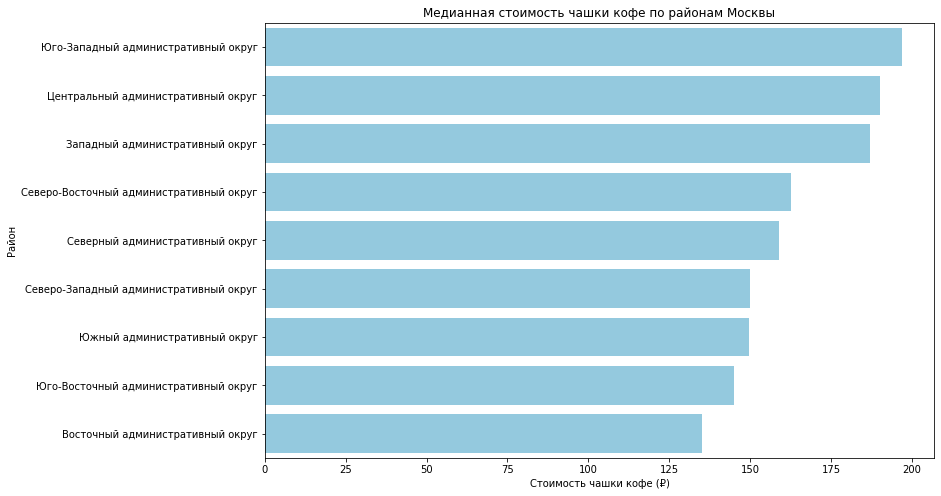

In [95]:
# Визуализируем медианную стоимость чашки кофе по районам
plt.figure(figsize=(12, 8))
sns.barplot(x='middle_coffee_cup', y='district', data=median_coffee_by_district, color='skyblue')
plt.title('Медианная стоимость чашки кофе по районам Москвы')
plt.xlabel('Стоимость чашки кофе (₽)')
plt.ylabel('Район')

В Юго-Западном административном округе самая дорогая стоимость чашки кофе, а в Восточном наоборот самая недорогая.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

В ходе  исследования я проанализировал данные о заведениях общественного питания в Москве, используя два основных датасета: /datasets/rest_info.csv и /datasets/rest_price.csv. Мы выполнили следующие шаги:

Загрузка и знакомство с данными: Данные были загружены и проанализированы на наличие пропусков и соответствие описанию.
- Предобработка данных:  
Объединение датасетов, обработка пропусков, проверка типов данных и создание новых признаков.
* Исследовательский анализ данных:  
- Категории заведений:  
Наибольшее количество заведений представлено кафе (2378) и ресторанами (2043). Это указывает на их популярность среди потребителей.
- Административные районы:  
Центральный административный округ имеет наибольшее количество заведений (2242), что может свидетельствовать о высокой конкуренции и проходимости.
В Центральном округе рестораны занимают первое место по количеству заведений (670), что составляет 29.88% от общего числа заведений в этом округе.
- Сетевые и несетевые заведения:  
В Москве больше несетевых заведений (5201, 61.87%) по сравнению с сетевыми (3205, 38.13%).
Наибольшее количество сетевых заведений наблюдается в булочных (61%), пиццериях (52%) и кофейнях (50%).
- Количество посадочных мест:  
Рестораны имеют наибольшее медианное количество мест (86), в то время как булочные имеют наименьшее (50). Это может быть связано с форматом обслуживания и целевой аудиторией каждого типа заведения.
- Рейтинг заведений:  
Средний рейтинг заведений варьируется: у баров и пабов самый высокий рейтинг (4.39), а у категории "быстрое питание" самый низкий (4.05). Это подчеркивает важность поддержания высокого стандарта качества.
- Корреляция рейтингов:    
Наибольшая корреляция наблюдается с ценовой категорией (0.281), что указывает на то, что ценовая категория является важным фактором, влияющим на рейтинг заведений.
- Топ-15 популярных сетей:  

Лидером по количеству заведений является кофейня Шоколадница с 119 заведениями, и её средний рейтинг составляет 4.18.
Топ-3 по количеству заведений:
Шоколадница - 119 заведений
Домино'с Пицца - 76 заведений
Додо Пицца - 74 заведения
Топ-3 по среднему рейтингу:
Буханка - 4.41
Кофемания - 4.39
Кулинарная лавка братьев Караваевых - 4.39
Влияние удаленности от центра на цены:

- Вариация среднего чека в ЦАО:  
Средний чек в Центральном административном округе составляет 1191.06 ₽, что значительно выше, чем в других округах (827.71 ₽). Это может указывать на то, что заведения в центре ориентированы на более состоятельных клиентов или предлагают более высококачественные услуги.

- Средня стоимость чашки кофе:  
В ходе исследования выснилось, что в  Юго-Западном административном округе самая дорогая средняя стоимость чашки кофе 197 руб., в Восточном наоборот самая дешёвая 135 руб.



- Рекомендации на основе анализа данных:  
* Расширение сети:  
Рассмотреть возможность открытия новых заведений в менее популярных категориях, таких как столовые и булочные, которые могут иметь потенциал для роста.

* Ценовая политика:  
Учитывать, что заведения в центре имеют более высокие цены. Рекомендуется проводить анализ целевой аудитории и предлагать специальные предложения для привлечения клиентов.

* Качество услуг:  
Сосредоточиться на повышении качества обслуживания в заведениях, особенно в категориях с низким рейтингом, таких как "быстрое питание".

* Выбор местоположения:  
Рассмотреть открытие заведений в административных округах с высоким количеством заведений, таких как Центральный округ, что может привести к увеличению прибыли засчет проходимости.

[начало тетрадки](#intro)